In [3]:
import pandas as pd
import seaborn as sns


sns.set()

In [5]:
df_conversion = pd.read_csv("./conversion_data.csv")

df_conversion

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [8]:
df_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [76]:
df_conversion['new_user'] = df_conversion['new_user'].apply(bool)

In [96]:
df_conversion.groupby('source').count()['converted']

source
Ads        88740
Direct     72420
Seo       155040
Name: converted, dtype: int64

Text(0.5, 0.98, 'Demographic Information')

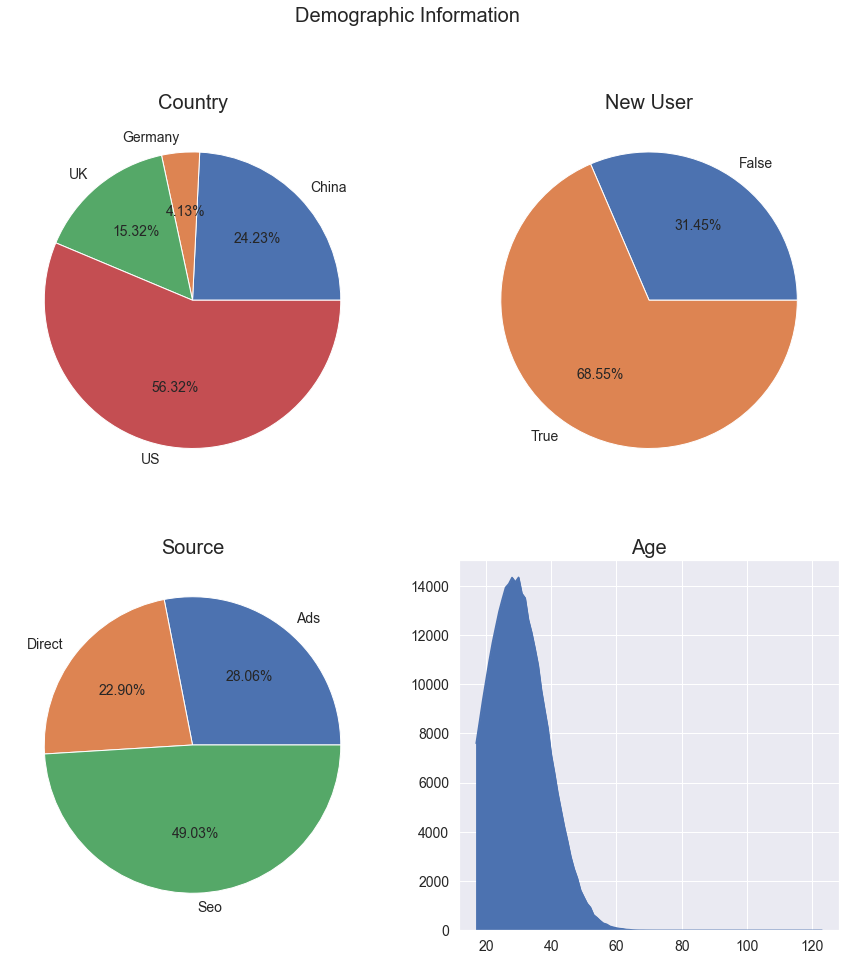

In [151]:
import matplotlib.pyplot as plt


demographic_labels = ['country', 'new_user']
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (15, 15))

for key, label in enumerate(demographic_labels):
    tmp = df_conversion.groupby(label).count()['converted']
    tmp.plot.pie(
        ax=ax[0][key],
        title=' '.join(label.title().split('_')),
        fontsize=14,
        ylabel='',
        autopct=lambda x: f'{x:.2f}%',
    )
    
    
df_conversion.groupby('source').count()['converted'].plot.pie(ax=ax[1][0], title='Source', ylabel='', autopct=lambda x: f'{x:.2f}%', fontsize=14)
df_conversion.groupby('age').count()['converted'].plot.area(ax=ax[1][1], title='Age', ylabel='', xlabel='', fontsize=14)

for axis in ax:
    axis[0].title.set_size(20)
    axis[1].title.set_size(20)

fig.suptitle('Demographic Information', fontsize=20)


(0.0, 150.0)

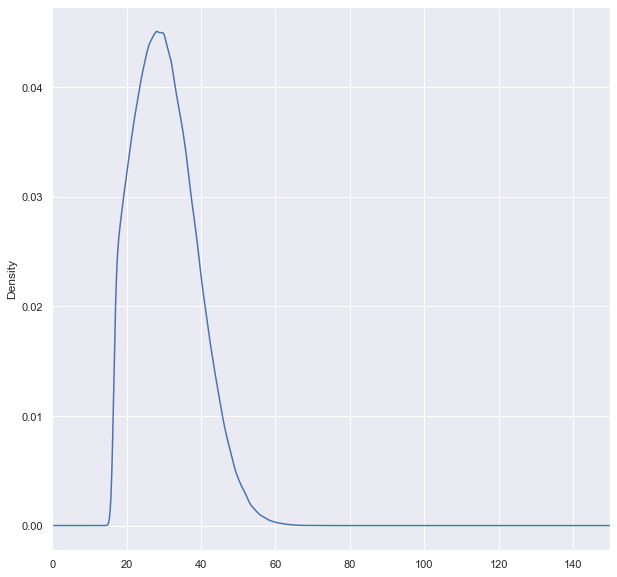

In [186]:
age_kde_hist = plt.figure(figsize=(10, 10))

age_kde_hist.add_subplot(df_conversion['age'].plot.kde())

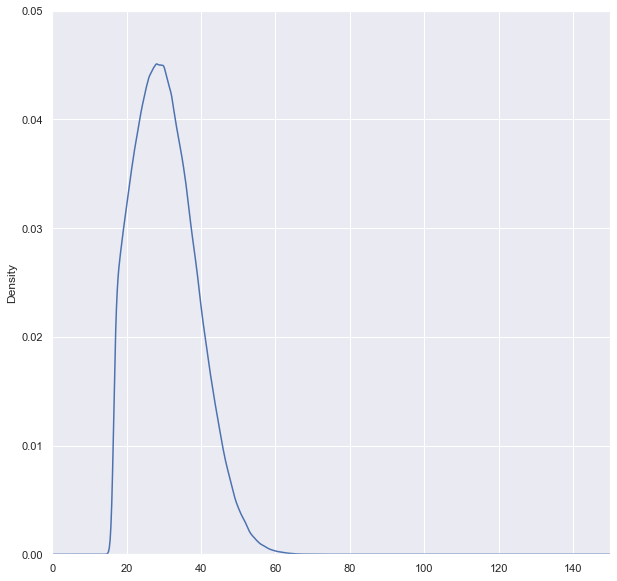

In [201]:
age_kde_hist.gca().set_ylim([0, 0.05])


age_kde_hist

In [206]:
print(df_conversion['age'].describe()); print(f'Kurtosis: {df_conversion["age"].kurt()}'); print(f'Skewness: {df_conversion["age"].skew()}')

count    316200.000000
mean         30.569858
std           8.271802
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max         123.000000
Name: age, dtype: float64
Kurtosis: -0.032362857321238
Skewness: 0.5193216964461843


Signature: pd.Series.plot.hist(self, by=None, bins=10, **kwargs)
Docstring:
Draw one histogram of the DataFrame's columns.

A histogram is a representation of the distribution of data.
This function groups the values of all given Series in the DataFrame
into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
This is useful when the DataFrame's Series are in a similar scale.

Parameters
----------
by : str or sequence, optional
    Column in the DataFrame to group by.
bins : int, default 10
    Number of histogram bins to be used.
**kwargs
    Additional keyword arguments are documented in
    :meth:`DataFrame.plot`.

Returns
-------
class:`matplotlib.AxesSubplot`
    Return a histogram plot.

See Also
--------
DataFrame.hist : Draw histograms per DataFrame's Series.
Series.hist : Draw a histogram with Series' data.

Examples
--------
When we draw a dice 6000 times, we expect to get each value around 1000
times. But when we draw two dices and sum the result, the distribution
